# <h1 style="color:#F7F145; font-family:courier; text-align:center; font-size:250%; background-color:#B8D5E6;">-- Mushroom Classification: Safe to eat or deadly poison? --</h1>
<em style="color:#BDB822; font-family:verdana;"> Basado en: https://www.kaggle.com/uciml/mushroom-classification/code </em>

<ul type=”A”>
  <li style="color:#AB2734; font-family:verdana;">Elizabeth Márquez Gómez</li>
</ul>

El siguiente proyecto tiene como objetivo aplicar los conocimientos adquiridos en el 5to módulo del programa de Bioinformática en la Licenciatura en Ciencias Genómicas, Universidad Nacional Autónoma de México.

# <h2 style="color:#BDB822; font-family:courier;">Índice</h2>
+ <a href="#Intro" style="color:#AB2734; font-family:verdana;">Introducción</a>
+ <a href="#Data" style="color:#AB2734; font-family:verdana;">Procesamiento de los datos</a>
+ <a href="#K-nearest" style="color:#AB2734; font-family:verdana;">K nearest neighbors</a>
+ <a href="#svm" style="color:#AB2734; font-family:verdana;">Support Vector Machine</a>
+ <a href="#dt" style="color:#AB2734; font-family:verdana;">Decision Trees</a>
+ <a href="#rf" style="color:#AB2734; font-family:verdana;">Random Forest</a>
+ <a href="#Conclusion" style="color:#AB2734; font-family:verdana;">Conclusiones</a>

<a id="Intro"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Introducción</h2>

<h2> Clasificación automática </h2>
Desde el inicio de la historia de la humanidad, se ha tenido la necesidad de clasificar o etiquetar los objetos a su alrededor con el fin de existir en un mundo organizado. Esta organización confiere muchas ventajas, estas pueden ir desde cuestiones tan sencillas como el gusto por cosas con cierta característica, hasta situaciones de vida o muerte donde recurrir a patrones de cosas previamente identificadas como peligrosas juegan un papel importante en la supervivencia.

Al paso de los años, el humano ha ido mejorando y desarrollando estas habilidades de clasificación. En la actualidad nos encontramos en un punto donde el desarrollo tecnológico ha facilitado y perfeccionado esta tarea debido a la gran cantidad de datos que puede manejar. 
La <i>Clasificación automática</i> deriva del <b>Aprendizaje automático <i>(Machine Learning)</i></b>, el cuál es una aplicación de la <i>Inteligencia Artificial</i> que provee a los sistemas la habilidad de aprender de los datos y mejorar con la experiencia, en vez de hacerlo por medio de la progrmación explícita.

El proceso de aprendizaje comienza con observaciones o información, como ejemplos, experiencia directa, o intrucciones, con el fin de buscar patrones en la información y tomar mejores decisiones en el futuro basado en los ejemplos que se ha provisto. 
Su objetivo principal es permitir a las computadoras aprender automáticamente sin intervención humana o asistencia, y ajustar las acciones en consecuencia.

Existen múltiples métodos de <i>Machine Learning</i>:
+ Algoritmos de aprendizaje supervisado
+ Algoritmos de aprendizaje no supervisado
+ Algoritmos de aprendizaje semi-supervisado
+ Algoritmos de aprendizaje de refuerzo
+ Algoritmos de aprendizaje profundo

<h2> Clasificación de hongos </h2>
Este proyecto, pretende resolver un problema de clasificación automatizada de hongos comestibles o venenosos con base en datos recabados desde <i>1981</i> por una serie de autores que han descrito características físicas y químicas de los hongos, así como reglas lógicas para su clasificación.

El set de datos incluye la descripción de 8124 muestras hipotéticas correspondientes a 23 especies de hongos con agallas de la familia <i>Agaricus</i> y <i>Lepiota</i>. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no se recomienda. Esta última clase se combinó con la venenosa.

Se evaluará un total de 22 atributos, entre ellos; forma de la capucha, color, olor, tamaño de tallo, población y habitat.

A partir de una evaluación ya hecha, el set de datos reporta una distribución de clases:
+ comestibles (<i>edible</i>): <b>4208 (51.8%)</b>
+ venenosos (<i>poisonous</i>): <b>3916 (48.2%)</b>
+ total: <b>8124</b> instances

<h2>Estrategia de clasificación</h2>
Debido a la estructura inicial de los datos a evaluar, se ha decidido convertirlo a un set de vectores numéricos que representarán las distintas letras de manera más eficaz. Este método de conversión es conocido como <i>Label Encoding</i>. Este método también ordena las categorías por orden alfabético.

Posterior al procesamiento de los datos, se pasará a la etapa de entrenamiento del algoritmo. Los resultados obtenidos de esta fase serán direccionados al modelo de clasificación.

<h3> Modelos de clasificación </h3>

Los siguientes modelos se implementarán para la clasificación y sus resultados serán comparados:

- <b>K-Nearest Neighbor (KNN)</b>
- <b>Support Vector Machine</b>
- <b>Decision Trees</b>
- <b>Random Forest</b>

<a id="Data"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Recuperación y procesamiento de datos</h2>

Implementación del método <i>"Label Encoder"</i> para el procesamiento de los datos.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Creating initial dataframe
mushroomAttributes = ['p', 'e', 'x', 's', 'n', 't', 'f', 'c', 'k', 'w', 'o', 'u', 'y', 'a', 'b', 'g', 'l', 'm', 'v', 'd', 'r', 'h', '?']
mushroomDF = pd.DataFrame(mushroomAttributes, columns=['Mushroom_Attributes'])

## Creating instance of labelencoder
labelencoder = LabelEncoder()

## Assigning numerical values and storing in another column
mushroomDF['Mushroom_Attributes_Cat'] = labelencoder.fit_transform(mushroomDF['Mushroom_Attributes'])

diccData = {'data':[], 'target':[]}
temporaryList = []
counter = 0

with open('./agaricus-lepiota.data', 'r') as workingFile:
    for line in workingFile:
        element = line.split(',')
        
        for characteristic in element:
            characteristic = characteristic.strip()
            
            ## Mapping the index number from the LabelEncoder DataFrame
            characteristicIndex = int(mushroomDF[mushroomDF['Mushroom_Attributes'] == characteristic].index[0])
            characteristicIndex = mushroomDF['Mushroom_Attributes_Cat'][characteristicIndex]

            if counter == 0:
                diccData['target'].append(characteristicIndex)
                counter += 1
        
            else:
                temporaryList.append(characteristicIndex)
                counter += 1
        
        diccData['data'].append(temporaryList)
        temporaryList = []
        counter = 0


In [2]:
## LabelEncoder DataFrame
mushroomDF

,Mushroom_Attributes,Mushroom_Attributes_Cat
0,p,14
1,e,5
2,x,21
3,s,16
4,n,12
5,t,17
6,f,6
7,c,3
8,k,9
9,w,20


In [3]:
from sklearn.model_selection import train_test_split

## Reading examples set
X = diccData['data']
print('Examples set:')
print(X[:5])

## Reading class values set for each example
y = diccData['target']
print('Class values set:')
print(y[:5])

## Separate the dataset in two: training and evaluation
## Only 30% of the data sample will be used to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Characteristics:')
print(y_train[:5])

print('Classes:')
print(y_test[:5])

Examples set:
[[21, 16, 12, 17, 14, 6, 3, 12, 9, 5, 5, 16, 16, 20, 20, 14, 20, 13, 14, 9, 16, 18], [21, 16, 22, 17, 1, 6, 3, 2, 9, 5, 3, 16, 16, 20, 20, 14, 20, 13, 14, 12, 12, 7], [2, 16, 20, 17, 10, 6, 3, 2, 12, 5, 3, 16, 16, 20, 20, 14, 20, 13, 14, 12, 12, 11], [21, 22, 20, 17, 14, 6, 3, 12, 12, 5, 5, 16, 16, 20, 20, 14, 20, 13, 14, 9, 16, 18], [21, 16, 7, 6, 12, 6, 20, 2, 9, 17, 5, 16, 16, 20, 20, 14, 20, 13, 5, 12, 1, 7]]
Class values set:
[14, 5, 5, 14, 5]
Characteristics:
[14, 5, 14, 5, 14]
Classes:
[14, 5, 5, 5, 5]


In [4]:
## Function to convert vectors with two values to boolean vectors (1,0)
def TurnIntoBoolean(vector):
    vector = [0 if i == 14 else i for i in vector]
    vector = [1 if i == 5 else i for i in vector]
    return np.array(vector)

In [15]:
## Converting the class vector to boolean. This will be used for all ROC curves.
y_bool_test = TurnIntoBoolean(y_test)
print(y_test[:5])
print(y_bool[:5])

[14, 5, 5, 5, 5]
[0 1 1 1 1]


In [29]:
## Importing common libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

<a id="K-nearest"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Clasificación <i>K nearest neighbors</i></h2>

<h4>K-Nearest Neighbor (KNN)</h4>

Es un algoritmo no paramétrico (es decir, no hace suposiciones subyacentes sobre la distribución de datos) que pertenece a la comunidad de aprendizaje supervisada. Asume que elementos similares existen a una proximidad cercana.

+ Ventajas:
    + Fácil de usar
    + Tiempo de cálculo rápido
    + No hace suposiciones sobre los datos.

+ Desventajas: 
    + La precisión depende de la calidad de los datos
    + Debe encontrar un valor k óptimo (número de vecinos más cercanos)
    + Deficiente para clasificar puntos de datos en un límite donde se pueden clasificar de una forma u otra.

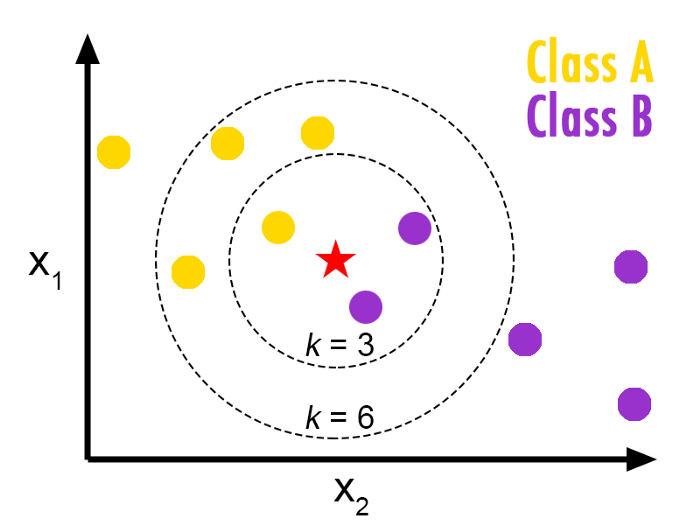

In [30]:
## K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

k = 5
## Classifier definition
classifier = KNeighborsClassifier(n_neighbors=k)
## Classifier training with the training dataset and class values
classifier.fit(X_train, y_train)
## Prediction with the trained classifier on the evaluation dataset
y_predict = classifier.predict(X_test)

print('Predicted examples set:')
print(X_test[:5])

print('Predicted class values set:')
print(y_predict[:5])

Predicted examples set:
[[21, 22, 12, 17, 14, 6, 3, 12, 14, 5, 5, 16, 16, 20, 20, 14, 20, 13, 14, 9, 16, 18], [6, 22, 7, 17, 12, 6, 3, 2, 14, 17, 2, 16, 16, 7, 7, 14, 20, 13, 14, 9, 22, 4], [21, 22, 22, 17, 1, 6, 3, 2, 9, 5, 3, 16, 16, 20, 20, 14, 20, 13, 14, 12, 12, 11], [21, 16, 20, 6, 12, 6, 20, 2, 9, 17, 5, 16, 16, 20, 20, 14, 20, 13, 5, 9, 1, 7], [21, 6, 12, 17, 12, 6, 3, 2, 14, 17, 2, 16, 16, 14, 20, 14, 20, 13, 14, 12, 19, 4]]
Predicted class values set:
[14  5  5  5  5]


In [31]:
## Classifier performance measures
print('Classes:')
print(y_test[:5])

print('Predicted classes:')
print(y_predict[:5])

print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Classes:
[14, 5, 5, 5, 5]
Predicted classes:
[14  5  5  5  5]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0


In [32]:
## Summary of classification measures
target_names = ['Edible', 'Poisonous']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1272
   Poisonous       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



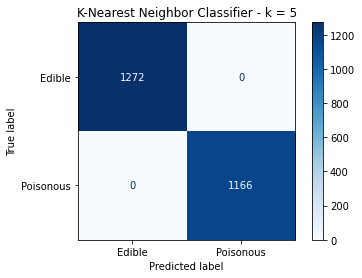

In [33]:
## Showing the confusion matrix
knnResults = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=target_names)

knnResults.ax_.set_title('K-Nearest Neighbor Classifier - k = 5')
knnResults

In [34]:
## Converting the predicted class vector to boolean
y_bool_predict = TurnIntoBoolean(y_predict)

In [35]:
## Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(y_bool_test)):
    fpr[i], tpr[i], _ = roc_curve(y_bool_test, y_bool_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])

## Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bool_test.ravel(), y_bool_predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

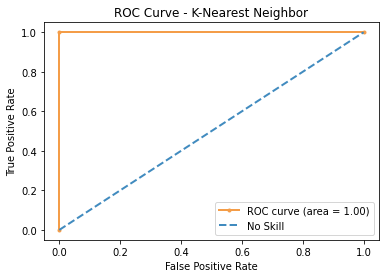

In [18]:
## Plotting ROC Curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='#f49d48',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2], marker='.')
plt.plot([0, 1], [0, 1], color='#418bbf', lw=lw, linestyle='--', label='No Skill')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbor')
plt.legend(loc="lower right")
plt.show()

A partir de los datos obtenidos por el método <i>"K-Nearest Neighbor clasification"</i> se obtuvo una clasificación total y muy limpia de los datos. Con un índice de <i>"precision"</i> de 1 y de <i>"recall"</i> de 1. La gráfica <i>ROC-Curve</i> muestra claramente este balance entre ambos parámetros. 
La selección de k = 5 se realizó después de una prueba interna con varias k en un rango de 3-21.

<a id="svm"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Clasificación <i>Support Vector Machine </i></h2>

<h4>Support Vector Machine</h4>

Es un clasificador discriminativo definido formalmente por un hiperplano separador. En otras palabras, dados los datos de entrenamiento etiquetados (aprendizaje supervisado), el algoritmo genera un hiperplano óptimo que categoriza nuevos ejemplos. En el espacio bidimensional, este hiperplano es una línea que divide un plano en dos partes, donde en cada clase se encuentra a cada lado.

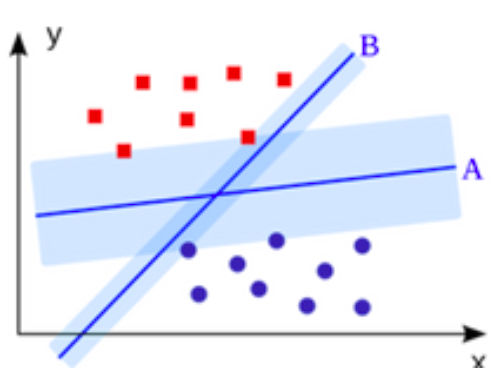

In [48]:
# Clasificación SVC
from sklearn.svm import SVC

# Definición del clasificador
svm_classifier = SVC(kernel="linear", probability=True)
# Entrenamiento del clasificador con lo datos de entrenamiento y valores de clase para cada ejemplo
svm_classifier.fit(X_train, y_train)
# Predicción con el clasificador entrenado en los datos de evaluación 
y_predict = svm_classifier.predict(X_test)
y_predict

#####
# keep probabilities for the positive outcome only
lr_probs = y_predict

In [49]:
# Medidas de rendimiento del clasificador
print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 0.9540607054963085
Precision: 0.9560688405797102
Recall: 0.9528659233847914
F-score: 0.9538415246415423


In [50]:
# Resumen de medidas de clasificación
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      Edible       0.93      0.98      0.96      1272
   Poisonous       0.98      0.93      0.95      1166

    accuracy                           0.95      2438
   macro avg       0.96      0.95      0.95      2438
weighted avg       0.96      0.95      0.95      2438



[[1247   25]
 [  87 1079]]


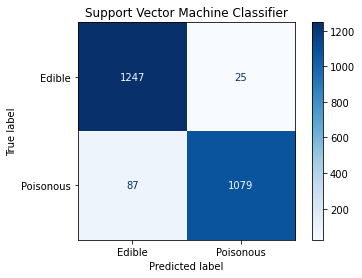

In [51]:
print(confusion_matrix(y_test, y_predict))
svmResults = plot_confusion_matrix(svm_classifier, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=target_names)
svmResults.ax_.set_title('Support Vector Machine Classifier')
svmResults


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.047


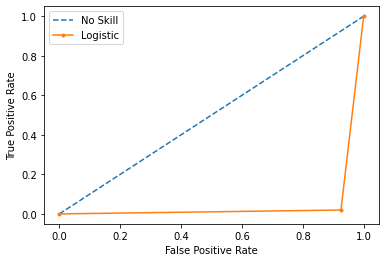

In [52]:
# calculate scores
ns_auc = roc_auc_score(y_true, ns_probs)
lr_auc = roc_auc_score(y_true, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [13]:
from sklearn.manifold import TSNE
X_test_embedded = TSNE(n_components=2).fit_transform(X_test)

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

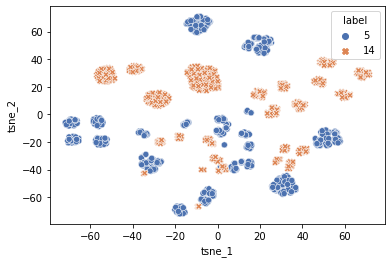

In [27]:
import seaborn as sns

plt.figure()
tsne_result_df = pd.DataFrame({'tsne_1': X_test_embedded[:,0], 'tsne_2': X_test_embedded[:,1], 'label': y_test})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', style= 'label', data=tsne_result_df, palette="deep")

El modelo <i>"Support Vector Machine"</i> no muestra un buen rendimiento de predicción. En promedio presenta error de predicción en un 5% de los datos. Esto es posible confirmarlo por medio de la gráfica scatterplot, donde se observa sobrelape entre ambas clases en el centro del plano.

<a id="dt"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Clasificación <i>Decision Trees</i></h2>

<h4>Decision Trees</h4>

Un árbol de decisión es un árbol donde cada nodo representa una característica (atributo), cada enlace (rama) representa una decisión (regla) y cada hoja representa un resultado (valor categórico o continuo).
La idea es crear un árbol como este para todos los datos y procesar un único resultado en cada hoja (o minimizar el error en cada hoja).

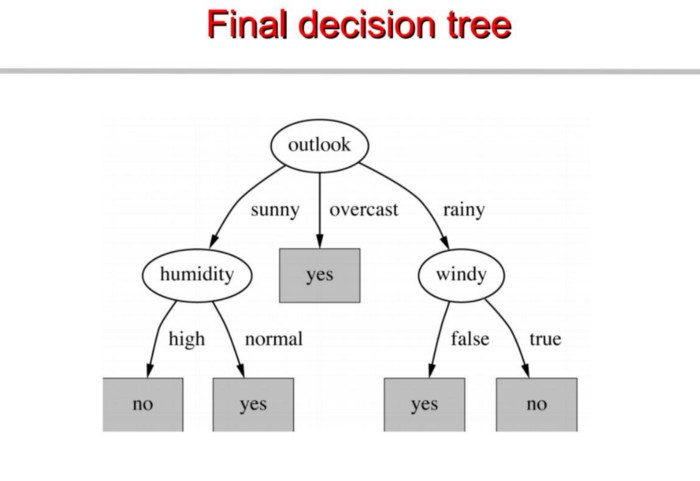

In [54]:
# Clasificación Decision Trees
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_predict = clf_tree.predict(X_test)
print(y_predict)

#####
# keep probabilities for the positive outcome only
lr_probs = y_predict

[14  5  5 ... 14 14 14]


In [55]:
# Medidas de rendimiento del clasificador
print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0


In [56]:
# Resumen de medidas de clasificación
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1272
   Poisonous       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



[[1272    0]
 [   0 1166]]


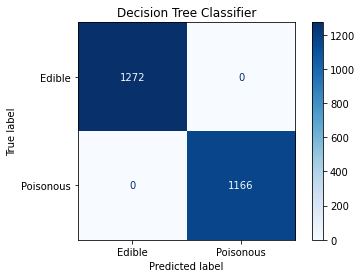

In [57]:
print(confusion_matrix(y_test, y_predict))
dtResults = plot_confusion_matrix(clf_tree, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=target_names) 
dtResults.ax_.set_title('Decision Tree Classifier')
dtResults

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.000


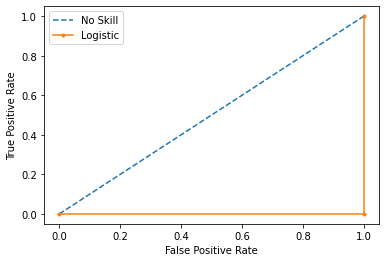

In [58]:
# calculate scores
ns_auc = roc_auc_score(y_true, ns_probs)
lr_auc = roc_auc_score(y_true, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

El método <i>"Decision Tree"</i> ha demostrado un buen rendimiento, con resultados iguales al método KNN. 

<a id="rf"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Clasificación <i>Random Forest</i></h2>

<h4>Random Forest</h4>

El algoritmo de bosque aleatorio se compone de diferentes árboles de decisión, cada uno con los mismos nodos, pero utilizando diferentes datos que conducen a diferentes hojas. Fusiona las decisiones de varios árboles de decisión para encontrar una respuesta, que representa el promedio de todos estos árboles de decisión.
Es un modelo de aprendizaje supervisado; utiliza datos etiquetados para "aprender" cómo clasificar datos no etiquetados.

+ Ventajas:
    + Se utiliza para problemas de regresión y clasificación, lo que lo convierte en un modelo diverso.
    + Evita el sobreajuste de datos.
    + Rápido de entrenar con datos de prueba.

+ Desventajas: 
    + Lento en la creación de predicciones una vez hecho el modelo.
    + Debe tener cuidado con los valores atípicos y los huecos en los datos.

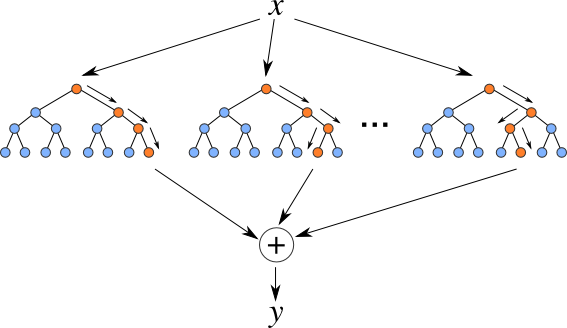

In [59]:
# Clasificación Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(y_predict)

#####
# keep probabilities for the positive outcome only
lr_probs = y_predict

[14  5  5 ... 14 14 14]


In [60]:
# Medidas de rendimiento del clasificador

print("Accuracy: {}".format(accuracy_score(y_test, y_predict)))
print("Precision: {}".format(precision_score(y_test, y_predict, average="macro")))
print("Recall: {}".format(recall_score(y_test, y_predict, average="macro")))
print("F-score: {}".format(f1_score(y_test, y_predict, average="macro")))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-score: 1.0


In [61]:
# Resumen de medidas de clasificación

print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1272
   Poisonous       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



[[1272    0]
 [   0 1166]]


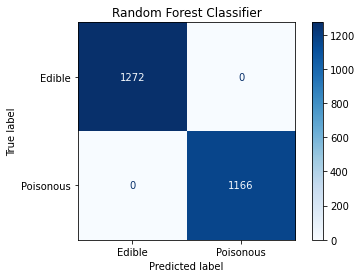

In [62]:
# Matriz de confusion para comestibles y venenosos
print(confusion_matrix(y_test, y_predict))
rfResults = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=target_names) 
rfResults.ax_.set_title('Random Forest Classifier')
rfResults

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.000


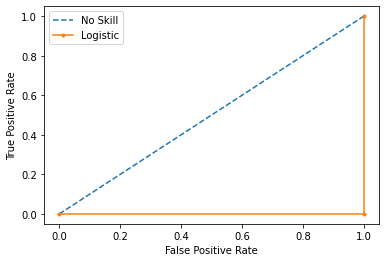

In [63]:
# calculate scores
ns_auc = roc_auc_score(y_true, ns_probs)
lr_auc = roc_auc_score(y_true, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

El método <i>"Random Forest"</i> también ha demostrado un buen rendimiento. El valor de <i>recall</i> y <i>precision</i> son 1.

<a id="Conclusion"></a>
<h2 style="color:#BDB822; font-family:courier; background-color:#CCECFF;">Conclusiones</h2>

Se puede concluir que el método <i>Support Vector Machine no ha logrado un buen rendimiento, existen muchos datos que no pudo clasificar de manera certera. Esto es posible explicarlo al analizar la gráfica scatterplot, pues existen varios elementos que se encuentran sobrepuestos por lo cual los vectores de soporte no logran clusterizar los datos.

Por el otro lado, los métodos K-Nearest Neighbor, Decision Tree y Random Forest logran una clasificación completa de los elementos. Los tres métodos muestran valores de recall = 1, así como un valor de precision = 1. Esto podría indicarnos 
Data set es linealmente separable

+ <i>What is Machine Learning? A definition - Expert System. (2020). Retrieved 30 March 2021, from https://www.expert.ai/blog/machine-learning-definition/</i>
+ <i>What is Machine Learning?. (2020). Retrieved 30 March 2021, from https://www.ibm.com/cloud/learn/machine-learning</i>
+ <i>Categorical encoding using Label-Encoding and One-Hot-Encoder. (2019). Retrieved 30 March 2021, from https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd</i>
+ <i>K-Nearest Neighbors. (2018). Retrieved 30 March 2021, from https://medium.com/@srishtisawla/k-nearest-neighbors-f77f6ee6b7f5#:~:text=K%2DNearest%20Neighbors%20is%20one%20of%20the%20most%20basic%20algorithm,be%20used%20for%20regression%20problems.</i>
+ <i>Chapter 2 : SVM (Support Vector Machine) — Theory. (2017). Retrieved 30 March 2021, from https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72#:~:text=A%20Support%20Vector%20Machine%20(SVM,hyperplane%20which%20categorizes%20new%20examples.</i>
+ <i>Chapter 4: Decision Trees Algorithms. (2018). Retrieved 30 March 2021, from https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1</i>
+ <i>Random Forest Algorithm for Machine Learning. (2020). Retrieved 30 March 2021, from https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb</i>